In [ ]:
#kmr project two

In [161]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import time
#import json
#import requests
import quandl

In [151]:
zillow_path = "zillow_ke.csv"
zillow_df = pd.read_csv(zillow_path)
zillow_df = zillow_df.rename(columns={"Date" : "Date Zillow"})
zillow_df.head()

,Unnamed: 0,Indicator ID,Indicator,Region ID,Region Type,Region Name,Date Zillow,Value,Timepoint
0,0,SRAW,"Median Sale Price (Raw, All Homes, Weekly View)",394484,metro,"Colorado Springs, CO",4/2/2016,252000.0,2016-4
1,1,SRAW,"Median Sale Price (Raw, All Homes, Weekly View)",394484,metro,"Colorado Springs, CO",4/9/2016,253500.0,2016-4
2,2,SRAW,"Median Sale Price (Raw, All Homes, Weekly View)",394484,metro,"Colorado Springs, CO",4/16/2016,241075.0,2016-4
3,3,SRAW,"Median Sale Price (Raw, All Homes, Weekly View)",394484,metro,"Colorado Springs, CO",4/23/2016,248870.0,2016-4
4,4,SRAW,"Median Sale Price (Raw, All Homes, Weekly View)",394484,metro,"Colorado Springs, CO",4/30/2016,258000.0,2016-4


In [152]:
unemployment_path = "unemployment_ke.csv"
unemployment_df = pd.read_csv(unemployment_path)
unemployment_df = unemployment_df.rename(columns={"Year" : "Year Unemployment", "Period": "Month Unemployment"})
unemployment_df.head()

,Year Unemployment,Month Unemployment,Month,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate,Timepoint
0,2010,Apr,4,70.8,64.7,2725446,2489593,235853,8.7,2010-4
1,2011,Apr,4,69.7,63.8,2725243,2495652,229591,8.4,2011-4
2,2012,Apr,4,69.2,63.6,2750712,2528512,222200,8.1,2012-4
3,2013,Apr,4,68.3,63.5,2766087,2568489,197598,7.1,2013-4
4,2014,Apr,4,67.9,64.2,2796938,2645435,151503,5.4,2014-4


In [153]:
interest_path = "interest_ke.csv"
interest_df = pd.read_csv(interest_path)
interest_df = interest_df.rename(columns={"Date" : "Date Interest"})
interest_df.head()

,Date Interest,Wells Fargo Rate,Freddie Mac Rate,Date.1,Unnamed: 4,Unnamed: 5,Timepoint
0,4/28/2016,3.875,3.66,1/4/1900,28,2016,2016-4
1,5/5/2016,3.750,3.61,1/5/1900,5,2016,2016-5
2,5/12/2016,3.750,3.57,1/5/1900,12,2016,2016-5
3,5/19/2016,3.875,3.58,1/5/1900,19,2016,2016-5
4,5/26/2016,3.875,3.64,1/5/1900,26,2016,2016-5


In [154]:
stage1 = pd.merge(zillow_df, unemployment_df, how='outer', on='Timepoint')
stage1.head()

,Unnamed: 0,Indicator ID,Indicator,Region ID,Region Type,Region Name,Date Zillow,Value,Timepoint,Year Unemployment,Month Unemployment,Month,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate
0,0.0,SRAW,"Median Sale Price (Raw, All Homes, Weekly View)",394484.0,metro,"Colorado Springs, CO",4/2/2016,252000.0,2016-4,2016.0,Apr,4.0,66.8,64.5,2875505.0,2776260.0,99245.0,3.5
1,1.0,SRAW,"Median Sale Price (Raw, All Homes, Weekly View)",394484.0,metro,"Colorado Springs, CO",4/9/2016,253500.0,2016-4,2016.0,Apr,4.0,66.8,64.5,2875505.0,2776260.0,99245.0,3.5
2,2.0,SRAW,"Median Sale Price (Raw, All Homes, Weekly View)",394484.0,metro,"Colorado Springs, CO",4/16/2016,241075.0,2016-4,2016.0,Apr,4.0,66.8,64.5,2875505.0,2776260.0,99245.0,3.5
3,3.0,SRAW,"Median Sale Price (Raw, All Homes, Weekly View)",394484.0,metro,"Colorado Springs, CO",4/23/2016,248870.0,2016-4,2016.0,Apr,4.0,66.8,64.5,2875505.0,2776260.0,99245.0,3.5
4,4.0,SRAW,"Median Sale Price (Raw, All Homes, Weekly View)",394484.0,metro,"Colorado Springs, CO",4/30/2016,258000.0,2016-4,2016.0,Apr,4.0,66.8,64.5,2875505.0,2776260.0,99245.0,3.5


In [155]:
stage2 = pd.merge(stage1, interest_df, how='outer', on='Timepoint')
stage2.head(2)

,Unnamed: 0,Indicator ID,Indicator,Region ID,Region Type,Region Name,Date Zillow,Value,Timepoint,Year Unemployment,...,labor force,employment,unemployment,unemployment rate,Date Interest,Wells Fargo Rate,Freddie Mac Rate,Date.1,Unnamed: 4,Unnamed: 5
0,0.0,SRAW,"Median Sale Price (Raw, All Homes, Weekly View)",394484.0,metro,"Colorado Springs, CO",4/2/2016,252000.0,2016-4,2016.0,...,2875505.0,2776260.0,99245.0,3.5,4/28/2016,3.875,3.66,1/4/1900,28.0,2016.0
1,1.0,SRAW,"Median Sale Price (Raw, All Homes, Weekly View)",394484.0,metro,"Colorado Springs, CO",4/9/2016,253500.0,2016-4,2016.0,...,2875505.0,2776260.0,99245.0,3.5,4/28/2016,3.875,3.66,1/4/1900,28.0,2016.0


In [156]:
matchmaker_df = stage2[["Year Unemployment", "Month Unemployment", "Timepoint", "Region ID", "Region Name", "Region Type", "Indicator ID", "Indicator", "Value", "unemployment rate", "Wells Fargo Rate", "Freddie Mac Rate", "Date Zillow" , "Date Interest"]]
matchmaker_df.head()

,Year Unemployment,Month Unemployment,Timepoint,Region ID,Region Name,Region Type,Indicator ID,Indicator,Value,unemployment rate,Wells Fargo Rate,Freddie Mac Rate,Date Zillow,Date Interest
0,2016.0,Apr,2016-4,394484.0,"Colorado Springs, CO",metro,SRAW,"Median Sale Price (Raw, All Homes, Weekly View)",252000.0,3.5,3.875,3.66,4/2/2016,4/28/2016
1,2016.0,Apr,2016-4,394484.0,"Colorado Springs, CO",metro,SRAW,"Median Sale Price (Raw, All Homes, Weekly View)",253500.0,3.5,3.875,3.66,4/9/2016,4/28/2016
2,2016.0,Apr,2016-4,394484.0,"Colorado Springs, CO",metro,SRAW,"Median Sale Price (Raw, All Homes, Weekly View)",241075.0,3.5,3.875,3.66,4/16/2016,4/28/2016
3,2016.0,Apr,2016-4,394484.0,"Colorado Springs, CO",metro,SRAW,"Median Sale Price (Raw, All Homes, Weekly View)",248870.0,3.5,3.875,3.66,4/23/2016,4/28/2016
4,2016.0,Apr,2016-4,394484.0,"Colorado Springs, CO",metro,SRAW,"Median Sale Price (Raw, All Homes, Weekly View)",258000.0,3.5,3.875,3.66,4/30/2016,4/28/2016


In [157]:
mixmaster_df = matchmaker_df.rename(columns={"Indicator" : "Indicator Name", "unemployment rate":"Unemployment Rate"})
mixmaster_df.head()

,Year Unemployment,Month Unemployment,Timepoint,Region ID,Region Name,Region Type,Indicator ID,Indicator Name,Value,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate,Date Zillow,Date Interest
0,2016.0,Apr,2016-4,394484.0,"Colorado Springs, CO",metro,SRAW,"Median Sale Price (Raw, All Homes, Weekly View)",252000.0,3.5,3.875,3.66,4/2/2016,4/28/2016
1,2016.0,Apr,2016-4,394484.0,"Colorado Springs, CO",metro,SRAW,"Median Sale Price (Raw, All Homes, Weekly View)",253500.0,3.5,3.875,3.66,4/9/2016,4/28/2016
2,2016.0,Apr,2016-4,394484.0,"Colorado Springs, CO",metro,SRAW,"Median Sale Price (Raw, All Homes, Weekly View)",241075.0,3.5,3.875,3.66,4/16/2016,4/28/2016
3,2016.0,Apr,2016-4,394484.0,"Colorado Springs, CO",metro,SRAW,"Median Sale Price (Raw, All Homes, Weekly View)",248870.0,3.5,3.875,3.66,4/23/2016,4/28/2016
4,2016.0,Apr,2016-4,394484.0,"Colorado Springs, CO",metro,SRAW,"Median Sale Price (Raw, All Homes, Weekly View)",258000.0,3.5,3.875,3.66,4/30/2016,4/28/2016


In [158]:
mixmaster_df.to_csv("mixmaster3.csv", index=False, header=True)

In [211]:
nsam = mixmaster_df[(mixmaster_df["Indicator ID"] == "NSAM")]
daysonmarket = nsam.groupby(["Timepoint", "Region Name" , "Indicator ID", "Indicator Name", "Date Zillow"]).mean()["Value"]
print(len(nsam["Value"]))
daysonmarket.head(10)

834


Timepoint  Region Name           Indicator ID  Indicator Name                                       Date Zillow
2018-1     Boulder, CO           NSAM          Median Days to Pending (Smooth, All Homes, Monthly)  1/31/2018      36.0
           Colorado Springs, CO  NSAM          Median Days to Pending (Smooth, All Homes, Monthly)  1/31/2018      25.0
           Denver, CO            NSAM          Median Days to Pending (Smooth, All Homes, Monthly)  1/31/2018      20.0
           Fort Collins, CO      NSAM          Median Days to Pending (Smooth, All Homes, Monthly)  1/31/2018      35.0
           Greeley, CO           NSAM          Median Days to Pending (Smooth, All Homes, Monthly)  1/31/2018      26.0
           Pueblo, CO; CO        NSAM          Median Days to Pending (Smooth, All Homes, Monthly)  1/31/2018      30.0
2018-10    Boulder, CO           NSAM          Median Days to Pending (Smooth, All Homes, Monthly)  10/31/2018     27.0
           Colorado Springs, CO  NSAM          M

33
31.0


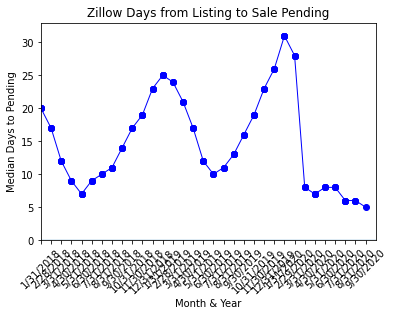

In [208]:
nsamdenver = nsam.loc[nsam["Region Name"] == "Denver, CO"]
print(len(nsamdenver["Date Zillow"].unique()))
print(nsamdenver["Value"].max())
x_lim = 33
y_lim = 31
x_axis = nsamdenver["Date Zillow"]
y_axis = nsamdenver["Value"]
plt.title("Zillow Days from Listing to Sale Pending")
plt.xlabel("Month & Year")
plt.ylabel("Median Days to Pending")
plt.xticks(rotation=45)

plt.hlines(0, 0, x_lim, alpha=0.2)
plt.xlim(0, x_lim)
plt.ylim(0, y_lim + 2)

plt.plot(x_axis, y_axis, marker="o", color="blue", linewidth=1)
plt.show()

In [213]:
cssm = mixmaster_df[(mixmaster_df["Indicator ID"] == "CSSM")]
discountshare = cssm.groupby(["Timepoint", "Region Name" , "Indicator ID", "Indicator Name", "Date Zillow"]).mean()["Value"]
print(len(cssm["Value"]))
discountshare.head(10)

834


Timepoint  Region Name           Indicator ID  Indicator Name                                                  Date Zillow
2018-1     Boulder, CO           CSSM          Share of Listings With a Price Cut (Smooth, SFR Only, Monthly)  1/31/2018      0.1200
           Colorado Springs, CO  CSSM          Share of Listings With a Price Cut (Smooth, SFR Only, Monthly)  1/31/2018      0.1372
           Denver, CO            CSSM          Share of Listings With a Price Cut (Smooth, SFR Only, Monthly)  1/31/2018      0.1529
           Fort Collins, CO      CSSM          Share of Listings With a Price Cut (Smooth, SFR Only, Monthly)  1/31/2018      0.1187
           Greeley, CO           CSSM          Share of Listings With a Price Cut (Smooth, SFR Only, Monthly)  1/31/2018      0.1159
           Pueblo, CO; CO        CSSM          Share of Listings With a Price Cut (Smooth, SFR Only, Monthly)  1/31/2018      0.1477
2018-10    Boulder, CO           CSSM          Share of Listings With a Price C

33
0.28800000000000003


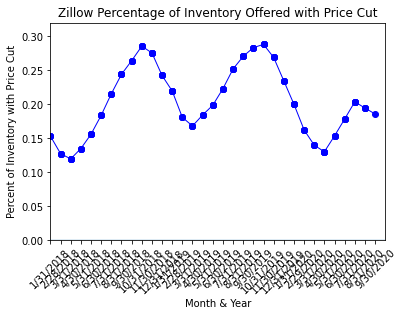

In [222]:
cssmdenver = cssm.loc[cssm["Region Name"] == "Denver, CO"]
print(len(cssmdenver["Date Zillow"].unique()))
print(cssmdenver["Value"].max())
x_lim = 33
y_lim = 0.30
x_axis = cssmdenver["Date Zillow"]
y_axis = cssmdenver["Value"]
plt.title("Zillow Percentage of Inventory Offered with Price Cut")
plt.xlabel("Month & Year")
plt.ylabel("Percent of Inventory with Price Cut")
plt.xticks(rotation=45)

plt.hlines(0, 0, x_lim, alpha=0.2)
plt.xlim(0, x_lim)
plt.ylim(0, y_lim + .02)

plt.plot(x_axis, y_axis, marker="o", color="blue", linewidth=1)
plt.show()

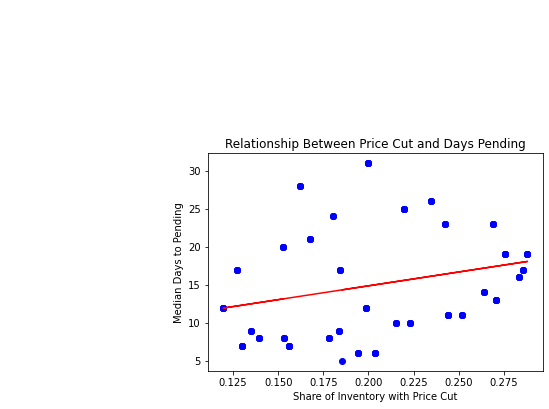

The correlation coefficient is 0.27
The line equation is as follows:  y = 36.42x + 7.59


In [223]:
#cssmdenver = cssm.loc[cssm["Region Name"] == "Denver, CO"]
x_axis = cssmdenver["Value"]
y_axis = nsamdenver["Value"]
plt.title("Relationship Between Price Cut and Days Pending")
plt.xlabel("Share of Inventory with Price Cut")
plt.ylabel("Median Days to Pending")
plt.scatter(x_axis, y_axis, marker="o", color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("3chart_cut2days.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

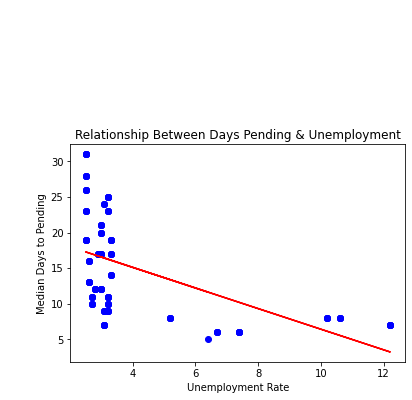

The correlation coefficient is -0.52
The line equation is as follows:  y = -1.45x + 20.9


In [224]:
#cssmdenver = cssm.loc[cssm["Region Name"] == "Denver, CO"]
x_axis = nsamdenver["Unemployment Rate"]
y_axis = nsamdenver["Value"]
plt.title("Relationship Between Days Pending & Unemployment")
plt.xlabel("Unemployment Rate")
plt.ylabel("Median Days to Pending")
plt.scatter(x_axis, y_axis, marker="o", color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("4chart_days2unemployment.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

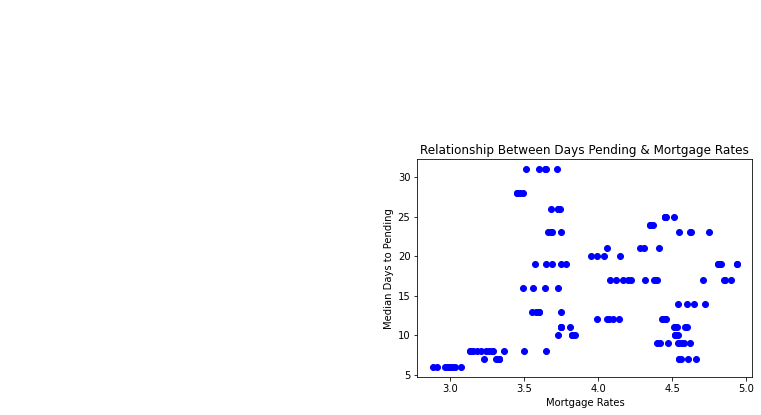

ValueError: array must not contain infs or NaNs

In [227]:
#cssmdenver = cssm.loc[cssm["Region Name"] == "Denver, CO"]
x_axis = nsamdenver["Freddie Mac Rate"]
y_axis = nsamdenver["Value"]
plt.title("Relationship Between Days Pending & Mortgage Rates")
plt.xlabel("Mortgage Rates")
plt.ylabel("Median Days to Pending")
plt.scatter(x_axis, y_axis, marker="o", color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("5chart_days2mortgagerate.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
#print(f"The line equation is as follows:  {line_eq}")